![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- For this project, we have reduced the number of images. There are around 16,500+ images in the dataset provided. You can check “label_details” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in training

In [2]:
#importing libraries
import pandas as pd
import h5py
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import zipfile as zf

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
import os
import pandas as pd
import cv2
import glob
import numpy as np
from glob import glob
import seaborn as sns

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
#navigating to the directory
%cd /content/gdrive/My Drive/Colab Notebooks/Trafficdata/

/content/gdrive/My Drive/Colab Notebooks/Trafficdata


In [ ]:
!ls

 data.csv				       SignalClass3.h5
'Data - German Traffic Sign Recognition'       SignalClass4.h5
'Data - German Traffic Sign Recognition.zip'


In [ ]:
!pwd

/content/gdrive/My Drive/Colab Notebooks/Trafficdata


In [ ]:
!ls

 data.csv				       SignalClass3.h5
'Data - German Traffic Sign Recognition'       SignalClass4.h5
'Data - German Traffic Sign Recognition.zip'


In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
zip = zf.ZipFile('/content/gdrive/My Drive/Colab Notebooks/Trafficdata/Data - German Traffic Sign Recognition.zip')
zip.extractall()
!ls

'Data - German Traffic Sign Recognition'
'Data - German Traffic Sign Recognition.zip'


In [ ]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


There is no folder called label_details. There is folder called meta, which containes information about images.

In [ ]:
#removing the corrupted image
os.remove('./Data - German Traffic Sign Recognition/Train/10/00010_00007_00018.png')

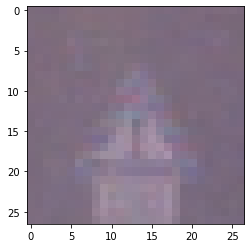

In [ ]:
#printing the image
from google.colab.patches import cv2_imshow
image_file = 'Data - German Traffic Sign Recognition/Train/18/00018_00000_00001.png'
sig_image = cv2.imread(image_file)
plt.imshow(plant_image)
#Inspect image


In [ ]:
sig_image.shape

(27, 27, 3)

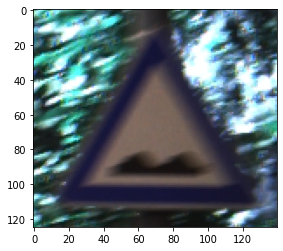

In [ ]:
image_file = 'Data - German Traffic Sign Recognition/Train/22/00022_00000_00029.png'
plant_image = cv2.imread(image_file)
plt.imshow(plant_image)
#Inspect image

In [ ]:
plant_image.shape

(125, 140, 3)

In [ ]:
#forming array of images
images = []
classes = []
df = pd.DataFrame(columns=['class','image_file'])
for class_folder in os.listdir("Data - German Traffic Sign Recognition/Train"):
    class_folder_path = os.path.join("Data - German Traffic Sign Recognition/Train", class_folder)
    #print(class_folder_path)
    for filename in glob(class_folder_path+"/*"):
      #print(filename)
      if(filename.endswith('.png')):
          im_dir = os.path.basename(class_folder_path)
          #print(im_dir)
          
        
          images.append(filename)
          #print(images)
          classes.append(im_dir)
          
          #Add record to the dataframe
          df.loc[df.shape[0]] = [im_dir,  filename]
          

In [ ]:
#exporting the dataform to csv
df.to_csv("data.csv",index=False)

In [ ]:
#loading the data
newdf = pd.read_csv("data.csv")

In [ ]:
newdf.head(2)

,class,image_file
0,26,Data - German Traffic Sign Recognition/Train/2...
1,26,Data - German Traffic Sign Recognition/Train/2...


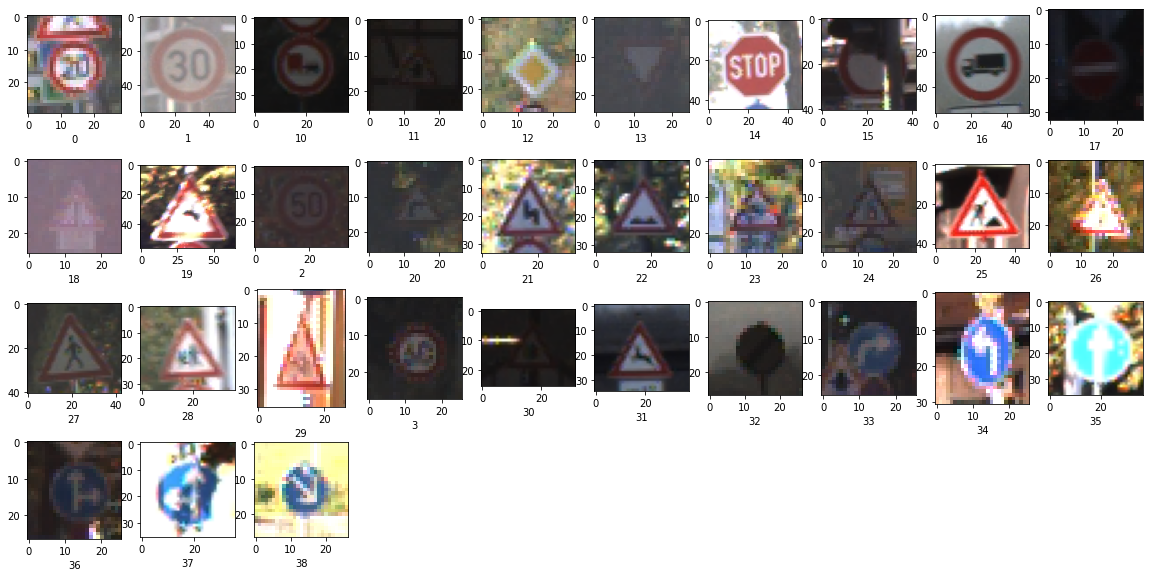

In [8]:
#viewing  the images of different classes
path = './Data - German Traffic Sign Recognition/Train'
files = []
count = 1
plt.figure(figsize = (20,10))
for folder in sorted(os.listdir(path)):
  files = sorted(os.listdir(path+'/'+folder))
  img = cv2.imread(path+'/'+folder+'/'+files[0])
  plt.subplot(4, 10, count)
  #plt.axis('off')
  plt.xlabel(folder)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  count = count + 1

In [ ]:
#these are unique class names in the dataset
class_names = newdf['class'].unique().tolist()
class_names

[26,
 17,
 16,
 37,
 21,
 22,
 32,
 35,
 28,
 33,
 34,
 20,
 38,
 25,
 19,
 18,
 2,
 29,
 30,
 24,
 3,
 27,
 31,
 36,
 23,
 13,
 15,
 10,
 1,
 12,
 0,
 11,
 14]

In [ ]:
#total number of classes in each group
newdf.groupby('class').count()

,image_file
class,
0,210
1,2220
2,2250
3,1410
10,2009
11,1320
12,2100
13,2160
14,780


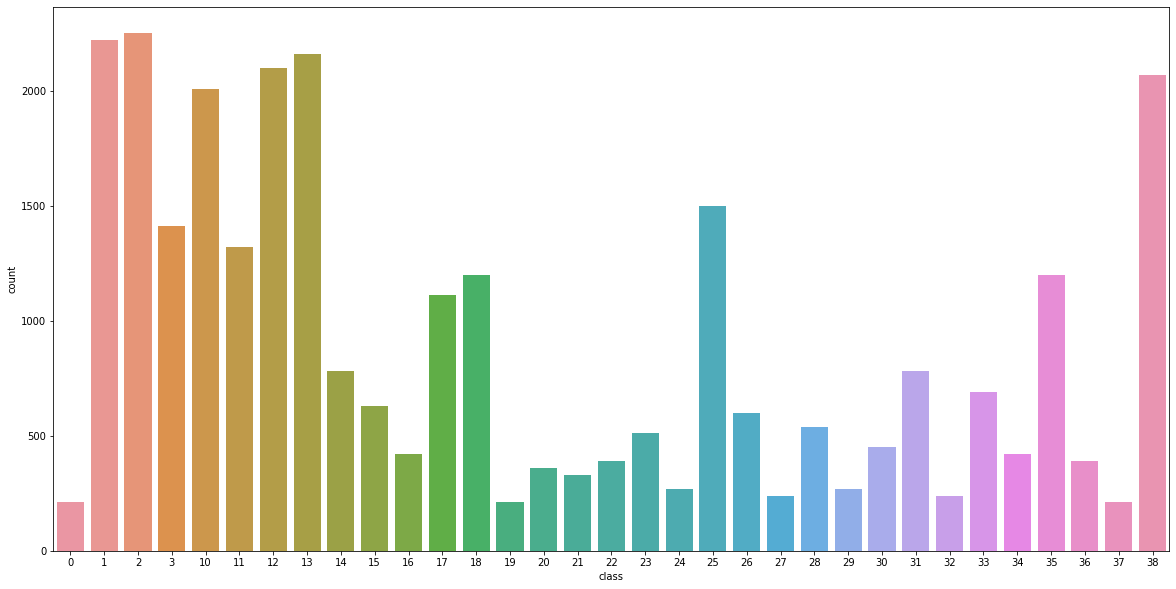

In [ ]:
#viewing the number of classes
plt.figure(figsize=(20,10))
sns.countplot(x = newdf['class'], data = newdf)

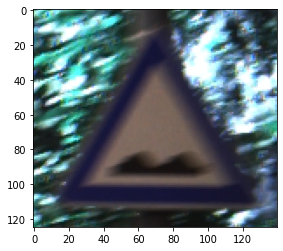

In [ ]:
image_file = 'Data - German Traffic Sign Recognition/Train/22/00022_00000_00029.png'
sig_image = cv2.imread(image_file)
plt.imshow(sig_image)
#Inspect image


In [ ]:
sigresize = cv2.resize(sig_image, dsize = (256,256),interpolation=cv2.INTER_AREA)

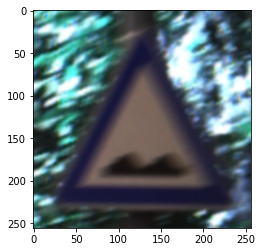

In [ ]:
#viewing the blurred image
newimage = cv2.GaussianBlur(sigresize,(5,5),0)
plt.imshow(newimage)

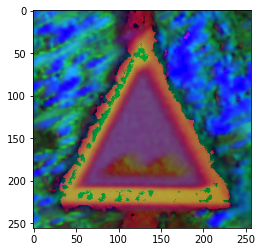

In [ ]:
#Create high intensity image
hsv = cv2.cvtColor(newimage, cv2.COLOR_BGR2HSV)

plt.imshow(hsv)


In [ ]:
# # from tqdm import tqdm
# # import cv2
# # feature = []
# # labels = []
# for f, img in tqdm(labels.values):
# #   img=cv2.imread('./train/{}.jpg'.format(f),1)
# #   img_resize = cv2.resize(train_img,(img_rows,img_cols))
# #   feature.append(img_resize)
# #   labels.append(img)

In [ ]:
#initialize image datagenerator
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
  rescale = 1./255,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range =0.2,
	horizontal_flip=False,
	vertical_flip=False,
	validation_split=0.25)

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
#the directory from image has to be loaded
directory_path = './Data - German Traffic Sign Recognition/Train'
img_size = 32 # image size is 32*32
img_depth = 3 #depth of image including RGB
batch_size = 70 #batch size
#forming the train generator
train_generator = img_generator.flow_from_directory(directory_path,
                                                    target_size=(img_size, img_size),
                                                    subset='training',
                                                    batch_size= batch_size,
                                                    #classes = ['0','1','2','3','10','11','12','13','14','15','16','17','18','19','20'],
                                                    class_mode="categorical",
                                                    color_mode ='rgb',
                                                   
                                                    )


Found 22124 images belonging to 33 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:

#Build validation generator
val_generator = img_generator.flow_from_directory(directory_path,
                                                    target_size=(img_size, img_size),
                                                    #classes = ['0','1','2','3','10','11','12','13','14','15','16','17','18','19','20'],
                                                    subset='validation',
                                                    batch_size=batch_size,
                                                    class_mode="categorical",
                                                    color_mode ='rgb',
                                                    )

Found 7364 images belonging to 33 classes.


### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [ ]:
import tensorflow as tf
from keras.layers import BatchNormalization
tf.keras.backend.clear_session()
#Initialize the model
model = tf.keras.Sequential()


#forming model with 6 convolutional layer, with filter size 3*3 with varyign number of filters
model.add(tf.keras.layers.Conv2D(8, kernel_size=(3, 3),activation='relu',name='conv_1',input_shape=(85, 85, 3) ))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3),activation='relu',name='conv_2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',name='conv_3'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu',name='conv_4'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3),activation='relu',name='conv_5'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu',name='conv_6'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='max_6'))
model.add(tf.keras.layers.Dropout(0.25,name='drop_6'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation='relu',name='dense_1'))
model.add(tf.keras.layers.Dropout(0.1,name='drop_7'))
model.add(tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax',name='dense_2'))


In [ ]:
#saving the model


### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [ ]:
#using adam optimizer with categorical_Crossentropy loss function and metrics as accuracy
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5,verbose = 1,mode ='auto')



### Get model summary (2 Marks)

In [ ]:
#model sumaary is printed below

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [ ]:
output =  model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator.classes)//batch_size,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = len(val_generator.classes)//batch_size, #Number of test images//batch_size
                    callbacks = [model_checkpoint,callback])

Epoch 1/10
368/368 [==============================] - ETA: 0s - loss: 18.8031 - accuracy: 0.5976
Epoch 00001: val_accuracy improved from -inf to 0.29249, saving model to /content/gdrive/My Drive/Colab Notebooks/GermanTraffic/SignalClass1.h5
368/368 [==============================] - 88s 240ms/step - loss: 18.8031 - accuracy: 0.5976 - val_loss: 11.9970 - val_accuracy: 0.2925
Epoch 2/10
368/368 [==============================] - ETA: 0s - loss: 1.9183 - accuracy: 0.7747
Epoch 00002: val_accuracy improved from 0.29249 to 0.64809, saving model to /content/gdrive/My Drive/Colab Notebooks/GermanTraffic/SignalClass1.h5
368/368 [==============================] - 86s 233ms/step - loss: 1.9183 - accuracy: 0.7747 - val_loss: 3.9648 - val_accuracy: 0.6481
Epoch 3/10
368/368 [==============================] - ETA: 0s - loss: 0.9658 - accuracy: 0.8229
Epoch 00003: val_accuracy improved from 0.64809 to 0.68320, saving model to /content/gdrive/My Drive/Colab Notebooks/GermanTraffic/SignalClass1.h5
368

In [ ]:
#model accuracy is not good with this layers. Building model with more layers for better accuracy and reduction of loss

In [ ]:
model_checkpoint1=tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/GermanTraffic/SignalClass2.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
import tensorflow as tf
from keras.layers import BatchNormalization
tf.keras.backend.clear_session()
#Initialize the model
model1 = tf.keras.Sequential()

#building model with 10 layers of convolutional layer
model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(img_size, img_size, img_depth), padding = 'same'))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu', padding = 'same'))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),name='max_1'))
model1.add(tf.keras.layers.Dropout(0.2,name='drop_1'))

model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3),activation='relu',padding = 'same'))
model1.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3),activation='relu',padding = 'same'))
model1.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3),activation='relu',padding = 'same'))
model1.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding = 'same'))

model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(tf.keras.layers.Dropout(0.2,name='drop_2'))

model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu',padding = 'same'))
model1.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu',padding = 'same'))
model1.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu',padding = 'same'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(tf.keras.layers.Dropout(0.25))


model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(1000, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.1))
model1.add(tf.keras.layers.Dense(33, activation='softmax'))


In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,verbose = 1,mode ='auto')
output1 = model1.fit(train_generator,
                    epochs=20,
                    steps_per_epoch=22124// 72,  #Number of training images//batch_size
                    validation_data= val_generator,
                    validation_steps = 7364//72, #Number of test images//batch_size
                    callbacks = [model_checkpoint1,callback]
                   )

Epoch 1/20
307/307 [==============================] - ETA: 0s - loss: 2.4757 - accuracy: 0.3384
Epoch 00001: val_accuracy improved from -inf to 0.26176, saving model to /content/gdrive/My Drive/Colab Notebooks/GermanTraffic/SignalClass2.h5
307/307 [==============================] - 38s 124ms/step - loss: 2.4757 - accuracy: 0.3384 - val_loss: 2.6586 - val_accuracy: 0.2618
Epoch 2/20
307/307 [==============================] - ETA: 0s - loss: 1.1069 - accuracy: 0.6386
Epoch 00002: val_accuracy improved from 0.26176 to 0.61389, saving model to /content/gdrive/My Drive/Colab Notebooks/GermanTraffic/SignalClass2.h5
307/307 [==============================] - 37s 120ms/step - loss: 1.1069 - accuracy: 0.6386 - val_loss: 1.4541 - val_accuracy: 0.6139
Epoch 3/20
307/307 [==============================] - ETA: 0s - loss: 0.7322 - accuracy: 0.7551
Epoch 00003: val_accuracy improved from 0.61389 to 0.65882, saving model to /content/gdrive/My Drive/Colab Notebooks/GermanTraffic/SignalClass2.h5
307/30

In [ ]:
output2 = model1.fit(train_generator,
                    epochs=40,
                    initial_epoch =20,
                    steps_per_epoch=22124// 72,  #Number of training images//batch_size
                    validation_data= val_generator,
                    validation_steps = 7364//72, #Number of test images//batch_size
                    callbacks = [model_checkpoint1,callback]
                   )

Epoch 21/40
307/307 [==============================] - ETA: 0s - loss: 0.2336 - accuracy: 0.9254
Epoch 00021: val_accuracy did not improve from 0.87778
307/307 [==============================] - 37s 122ms/step - loss: 0.2336 - accuracy: 0.9254 - val_loss: 2.6711 - val_accuracy: 0.8023
Epoch 22/40
307/307 [==============================] - ETA: 0s - loss: 0.2546 - accuracy: 0.9180
Epoch 00022: val_accuracy did not improve from 0.87778
307/307 [==============================] - 37s 121ms/step - loss: 0.2546 - accuracy: 0.9180 - val_loss: 1.1006 - val_accuracy: 0.8188
Epoch 23/40
307/307 [==============================] - ETA: 0s - loss: 0.1723 - accuracy: 0.9403
Epoch 00023: val_accuracy did not improve from 0.87778
307/307 [==============================] - 37s 120ms/step - loss: 0.1723 - accuracy: 0.9403 - val_loss: 0.5956 - val_accuracy: 0.8654
Epoch 24/40
307/307 [==============================] - ETA: 0s - loss: 0.1584 - accuracy: 0.9454
Epoch 00024: val_accuracy did not improve fro

In [ ]:
trainloss, trainaccuracy = model1.evaluate(train_generator)
testloss,testaccuracy = model1.evaluate(val_generator)
print('Train: %.3f, Test: %.3f' % (trainaccuracy, testaccuracy))

#Looks like accuracy is not better with this model.

123/123 [==============================] - 11s 93ms/step - loss: 18.4631 - accuracy: 0.7070
Train: 0.791, Test: 0.707


In [ ]:
import tensorflow as tf
from keras.layers import BatchNormalization
tf.keras.backend.clear_session()
#Initialize the model
model2 = tf.keras.Sequential()

#building 11 convolutional layer different number of filters and kernal size with padding same. Trying striding crashes kernal. building model without strides

model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(32, 32, 3), padding = 'same'))
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu', padding = 'same'))
model2.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding = 'same'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3),activation='relu',padding = 'same'))
model2.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3),activation='relu',padding = 'same'))
model2.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu',padding = 'same'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(tf.keras.layers.Dropout(0.2))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding = 'same'))
model2.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu',padding = 'same'))
model2.add(tf.keras.layers.Conv2D(512, kernel_size=(3, 3),activation='relu',padding = 'same'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu',padding = 'same'))
model2.add(tf.keras.layers.Conv2D(512, (3, 3), activation='relu',padding = 'same'))

model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(tf.keras.layers.Dropout(0.2))


model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(512, activation='relu'))
model2.add(tf.keras.layers.Dense(1000, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.1))
model2.add(tf.keras.layers.Dense(33, activation='softmax'))


In [ ]:
model_checkpoint2=tf.keras.callbacks.ModelCheckpoint('SignalClass4.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [ ]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,verbose = 1,mode ='auto')
output2 = model2.fit(train_generator,
                    epochs=5,
                    steps_per_epoch=22124// 70,  #Number of training images//batch_size
                    validation_data= val_generator,
                    validation_steps = 7364//70, #Number of test images//batch_size
                    callbacks = [model_checkpoint2,callback]
                   )

Epoch 1/5
316/316 [==============================] - ETA: 0s - loss: 2.3106 - accuracy: 0.3004
Epoch 00001: val_accuracy improved from -inf to 0.37551, saving model to SignalClass4.h5
316/316 [==============================] - 67s 213ms/step - loss: 2.3106 - accuracy: 0.3004 - val_loss: 1.9638 - val_accuracy: 0.3755
Epoch 2/5
316/316 [==============================] - ETA: 0s - loss: 1.1168 - accuracy: 0.6338
Epoch 00002: val_accuracy improved from 0.37551 to 0.50517, saving model to SignalClass4.h5
316/316 [==============================] - 47s 149ms/step - loss: 1.1168 - accuracy: 0.6338 - val_loss: 2.4649 - val_accuracy: 0.5052
Epoch 3/5
316/316 [==============================] - ETA: 0s - loss: 0.5185 - accuracy: 0.8341
Epoch 00003: val_accuracy improved from 0.50517 to 0.73537, saving model to SignalClass4.h5
316/316 [==============================] - 49s 154ms/step - loss: 0.5185 - accuracy: 0.8341 - val_loss: 0.9525 - val_accuracy: 0.7354
Epoch 4/5
316/316 [=====================

In [ ]:
model2.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.12556597590446472, 0.9642017483711243]

In [ ]:
model2.evaluate(val_generator)

106/106 [==============================] - 11s 106ms/step - loss: 0.3251 - accuracy: 0.9093


[0.3251148760318756, 0.9092884063720703]

In [ ]:
output3 = model2.fit(train_generator,
                    epochs=20,
                    initial_epoch =5,
                    steps_per_epoch=22124// 70,  #Number of training images//batch_size
                    validation_data= val_generator,
                    validation_steps = 7364//70, #Number of test images//batch_size
                    callbacks = [model_checkpoint2,callback]
                   )

Epoch 6/20
316/316 [==============================] - ETA: 0s - loss: 0.1326 - accuracy: 0.9649
Epoch 00006: val_accuracy improved from 0.91007 to 0.93483, saving model to SignalClass4.h5
316/316 [==============================] - 47s 150ms/step - loss: 0.1326 - accuracy: 0.9649 - val_loss: 0.2489 - val_accuracy: 0.9348
Epoch 7/20
316/316 [==============================] - ETA: 0s - loss: 0.0943 - accuracy: 0.9751
Epoch 00007: val_accuracy did not improve from 0.93483
316/316 [==============================] - 46s 144ms/step - loss: 0.0943 - accuracy: 0.9751 - val_loss: 0.3845 - val_accuracy: 0.9120
Epoch 8/20
316/316 [==============================] - ETA: 0s - loss: 0.1192 - accuracy: 0.9713
Epoch 00008: val_accuracy did not improve from 0.93483
316/316 [==============================] - 48s 151ms/step - loss: 0.1192 - accuracy: 0.9713 - val_loss: 0.2811 - val_accuracy: 0.9321
Epoch 9/20
316/316 [==============================] - ETA: 0s - loss: 0.1102 - accuracy: 0.9726
Epoch 00009:

In [ ]:
model2.evaluate(train_generator)

317/317 [==============================] - 34s 107ms/step - loss: 0.1439 - accuracy: 0.9736


[0.1438535451889038, 0.9736485481262207]

In [ ]:
model2.evaluate(val_generator)

106/106 [==============================] - 11s 106ms/step - loss: 0.4719 - accuracy: 0.9264


[0.4718516170978546, 0.9263986945152283]

In [ ]:
output4 = model2.fit(train_generator,
                    epochs=25,
                    initial_epoch =20,
                    steps_per_epoch=22124// 70,  #Number of training images//batch_size
                    validation_data= val_generator,
                    validation_steps = 7364//70, #Number of test images//batch_size
                    callbacks = [model_checkpoint2,callback]
                   )

Epoch 21/25
316/316 [==============================] - ETA: 0s - loss: 0.0429 - accuracy: 0.9914
Epoch 00021: val_accuracy did not improve from 0.96259
316/316 [==============================] - 46s 145ms/step - loss: 0.0429 - accuracy: 0.9914 - val_loss: 0.3004 - val_accuracy: 0.9408
Epoch 22/25
316/316 [==============================] - ETA: 0s - loss: 0.0513 - accuracy: 0.9892
Epoch 00022: val_accuracy did not improve from 0.96259
316/316 [==============================] - 46s 147ms/step - loss: 0.0513 - accuracy: 0.9892 - val_loss: 0.1919 - val_accuracy: 0.9585
Epoch 23/25
316/316 [==============================] - ETA: 0s - loss: 0.2866 - accuracy: 0.9322
Epoch 00023: val_accuracy did not improve from 0.96259
316/316 [==============================] - 46s 145ms/step - loss: 0.2866 - accuracy: 0.9322 - val_loss: 0.2657 - val_accuracy: 0.9369
Epoch 24/25
316/316 [==============================] - ETA: 0s - loss: 0.0587 - accuracy: 0.9865
Epoch 00024: val_accuracy did not improve fro

In [ ]:
model2.evaluate(train_generator)

317/317 [==============================] - 34s 109ms/step - loss: 0.0127 - accuracy: 0.9967


[0.012735443189740181, 0.9967004060745239]

In [ ]:
model2.evaluate(val_generator)

106/106 [==============================] - 11s 105ms/step - loss: 0.3065 - accuracy: 0.9576


[0.30654874444007874, 0.9576317071914673]

With the above model validation accuracy reaches 95.7

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, None, None, 3)     12        
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 64)    1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 128)   0         
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, 128)   512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   1

Model uses 9,381,565 parameters

In [ ]:
#y_predict1 = model2.predict_classes(val_generator)

In [ ]:
y_true = []
pred = []
i = 0
while i < 7364:
    i = i+1
    x, y = next(val_generator)
    pred.append(model2.predict(x[0].reshape(1,32,32,3)))
    y_true.append(y[0]) 

In [ ]:
y_truenew =[]
for j in y_true:
  y_truenew.append(np.argmax(j))

In [ ]:
#confusion_matrix(y_predict,y_truenew)
cm = confusion_matrix(y_predict,y_truenew)
print('confusion matrix')

class_label = class_names
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actuals")
plt.show()

Issues with colab, when tryign to predict, system crashes

### Draw plots (3 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

In [ ]:
#plotting the validation accuracy,training accuracy, training loss and validation loss

In [ ]:
print(output.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


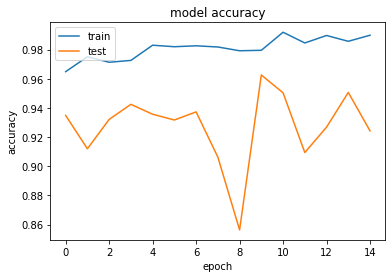

In [ ]:
# summarize history for accuracy
plt.plot(output3.history['accuracy'])
plt.plot(output3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

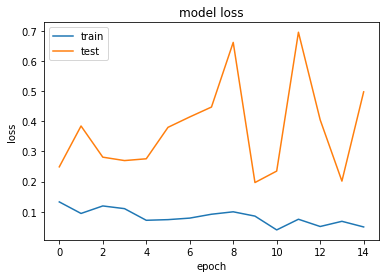

In [ ]:
# summarize history for loss
plt.plot(output3.history['loss'])
plt.plot(output3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Forming occlusion to check the areas of images used for prediction

In [ ]:
import math
patch_size = 10
stride = 2
img = []
img_size = 32
imageo = []
output_width = int(math.ceil(32 - patch_size)/stride + 1)
output_height = int(math.ceil(32 - patch_size)/stride + 1)
img_arr = np.array(images[1:10])
print(img_arr)
print(img_arr[0].shape)


['Data - German Traffic Sign Recognition/Train/26/00026_00017_00011.png'
 'Data - German Traffic Sign Recognition/Train/26/00026_00018_00026.png'
 'Data - German Traffic Sign Recognition/Train/26/00026_00019_00011.png'
 'Data - German Traffic Sign Recognition/Train/26/00026_00018_00029.png'
 'Data - German Traffic Sign Recognition/Train/26/00026_00018_00024.png'
 'Data - German Traffic Sign Recognition/Train/26/00026_00016_00023.png'
 'Data - German Traffic Sign Recognition/Train/26/00026_00017_00029.png'
 'Data - German Traffic Sign Recognition/Train/26/00026_00019_00018.png'
 'Data - German Traffic Sign Recognition/Train/26/00026_00019_00028.png']
()


In [ ]:
def create_image(images1):
  imgf = cv2.imread(images1)
   # dsize
  dsize = (32,32)
    #print(dsize)
  # resize image
  outputf = cv2.resize(imgf,dsize = dsize)
  return outputf

In [ ]:
heatmap = np.zeros((output_height, output_width))

Data - German Traffic Sign Recognition/Train/26/00026_00017_00011.png


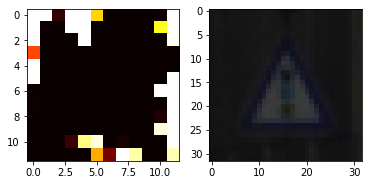

Data - German Traffic Sign Recognition/Train/26/00026_00018_00026.png


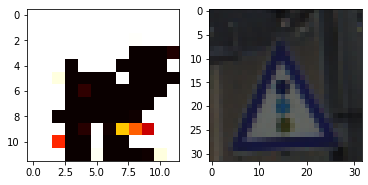

Data - German Traffic Sign Recognition/Train/26/00026_00019_00011.png


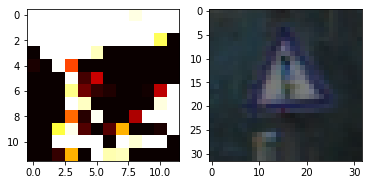

Data - German Traffic Sign Recognition/Train/26/00026_00018_00029.png


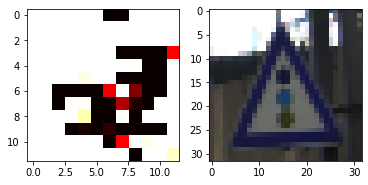

Data - German Traffic Sign Recognition/Train/26/00026_00018_00024.png


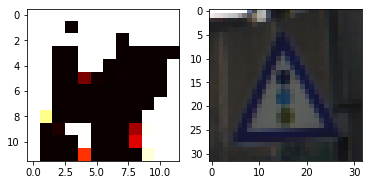

Data - German Traffic Sign Recognition/Train/26/00026_00016_00023.png


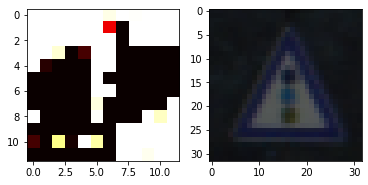

Data - German Traffic Sign Recognition/Train/26/00026_00017_00029.png


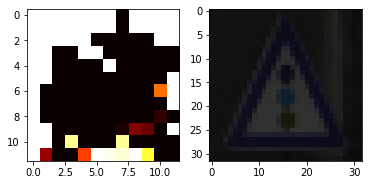

Data - German Traffic Sign Recognition/Train/26/00026_00019_00018.png


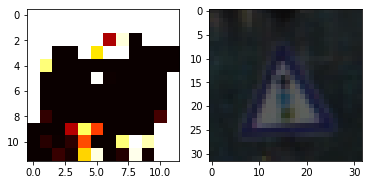

Data - German Traffic Sign Recognition/Train/26/00026_00019_00028.png


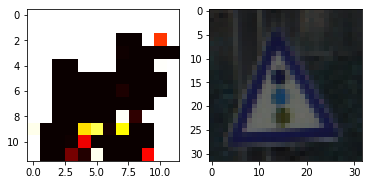

In [ ]:
output_width, output_height
#for im in imageoa[0:5]:
#img_copy = np.copy(imageoa[0])
#print(img_copy[0].shape)
for img in img_arr:
  print(img)
  img = create_image(img)
  img_array1 = np.expand_dims(img, axis=0)
    #Get the index with highest probability
  prediction = model2.predict(img_array1)
    #print(prediction[0])
  pred_index = np.argmax(prediction[0])

  for h in range(output_height):
    for w in range(output_width):
      h_start = h * stride
      w_start = w * stride
    #Create original image copy
      img_array = img.copy()

            #Update image with the patch
      img_array[h_start:h_start+patch_size, w_start: w_start+patch_size] = 255
            #cv2_imshow(img_array)
            #Create a batch
      img_array = np.expand_dims(img_array, axis=0)
            
            #Get the prediction
      prediction = model2.predict(img_array)[0]
            #print(prediction, prediction[pred_index])
            #Probability for right label, store it in the heatmap
      heatmap[h,w] = prediction[pred_index]
  #print(file_name)
  plt.subplot(1,2,1)
  plt.imshow(np.transpose(heatmap,(1,0)), cmap='hot', interpolation='nearest')
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Conclusion: 
The model with 11 concolution layers 3*3 filter helped in reduction of loss and improvement in validation accuracy.Can use transfer learning to check for improvement in accuracy. Image generator helps in reduction of overfitting. Using occlusion were able to check the areas used for prediction. 